In [1]:
# loading data sets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# combine monthly data into one 
import glob

path = r'C:/Users/omjee/Documents/Data Science/Keith_sales analysis/SalesAnalysis/Sales_Data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)

df_all = pd.concat(li, axis=0, ignore_index=True)

#Saving all data as csv
#df_all.to_csv('C:/Users/omjee/Documents/Data Science/Keith_sales analysis/SalesAnalysis/Sales_Data/all.csv', index=False) 

In [2]:
all_mon = pd.read_csv('C:/Users/omjee/Documents/Data Science/Keith_sales analysis/SalesAnalysis/Sales_Data/all.csv')
all_mon.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
all_mon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
all_mon.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
#Drop NaN values
all_mon.dropna(axis=0, inplace=True)

In [6]:
all_mon.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Which month has made the best sales and how much?

In [7]:
# Create Month column
all_mon['Month'] = all_mon['Order Date'].str[0:2]
all_mon.head()
#all_mon['Month'].dtype

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [8]:
# Unique values in 'Month' column
all_mon['Month'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Month, dtype: int64

In [9]:
# Drop rows with 'Or' values
all_mon = all_mon[all_mon['Month'].str[0:2] !='Or']
all_mon.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [10]:
# Unique entries after dropping entries with 'Or' value
all_mon['Month'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Name: Month, dtype: int64

In [11]:
# Change month value into numeric value
all_mon['Month'] = all_mon['Month'].astype('int32')

In [12]:
# There is give price tag for each item ordered
# so to get sales per item, a copule of steps is required
## 1: Create separate column 'Sale_Amount'
# Change column 'Price Each' (string) to float number
all_mon['Price Each'] = all_mon['Price Each'].astype('float')
all_mon['Quantity Ordered'] = all_mon['Quantity Ordered'].astype('int')
all_mon['Sale_Amount'] = (all_mon['Quantity Ordered']) * (all_mon['Price Each'])
all_mon.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale_Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [13]:
# Now group Sale_Amount according to months
#all_mon.groupby('Month').sum()                  # Numerical cols are summed up and grouped by months
#all_mon.groupby('Month').sum()['Sale_Amount']    # looks like, doesnt matter where you place .sum() function
all_mon.groupby('Month')['Sale_Amount'].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sale_Amount, dtype: float64

In [14]:
sale = all_mon.groupby('Month').sum()

print(sale)

       Quantity Ordered    Price Each   Sale_Amount
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06


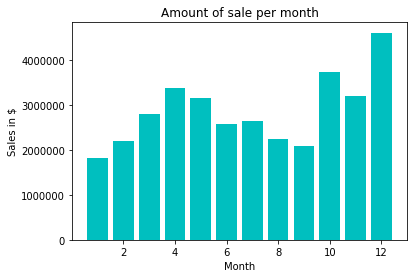

In [15]:
# Visualize Amount of sale per month
import matplotlib.pyplot as plt
months = (range(1, 13))

plt.bar(months, sale['Sale_Amount'], color='c')
plt.xlabel('Month')
plt.ylabel('Sales in $')
plt.title('Amount of sale per month')
plt.show()

In [16]:
all_mon['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [17]:
# function to get city's name from adress
def get_city(address):
    return address.split(',')[1]

# function to get state's name from adress
def get_state(state):
    return state.split(',')[2].split(' ')[1]        #use of double .split()function

In [18]:
#Question2: Citywise Sales

#all_mon['City'] = 
#all_mon['City'] = all_mon['Purchase Address'].apply(lambda x: x.split(',')[1])

# Another way is to apply get_city function in combination with lambda
all_mon['City'] = all_mon['Purchase Address'].apply(lambda x: get_city(x))
all_mon.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale_Amount,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [19]:
# To get city and its corresponding state
#all_mon['City'] = all_mon['Purchase Address'].apply(lambda x: get_city(x) + ' ' + (get_state(x)))
all_mon['City'] = all_mon['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_mon.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale_Amount,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [20]:
# Now get amount of sales per city
all_mon.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Sale_Amount
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


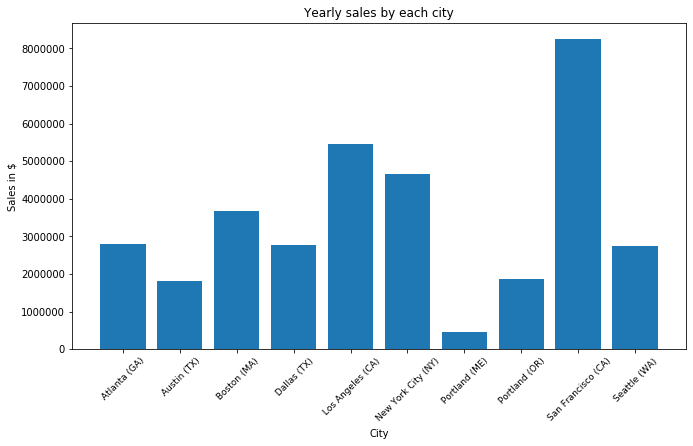

In [21]:
# Visualise sales_amount to each city
city = all_mon.groupby('City').sum()
plt.figure(figsize=(11,6))
plt.bar(city.index, city['Sale_Amount'])

plt.xticks(rotation='45', size=9)
plt.xlabel('City')
plt.ylabel('Sales in $')
plt.title('Yearly sales by each city')
plt.show()

In [22]:
# Next question: appropriate timing for advertisement that increases likelyhood of purchase
all_mon.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale_Amount,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [23]:
# Convert to datetime
all_mon['Order Date'] = pd.to_datetime(all_mon['Order Date'])
all_mon.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale_Amount,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [24]:
all_mon['Hour'] = all_mon['Order Date'].dt.hour
all_mon.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale_Amount,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [25]:
hour = all_mon.groupby('Hour').count()
hour

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale_Amount,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


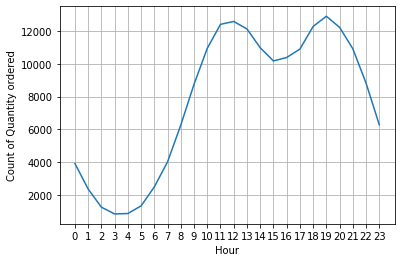

In [26]:
# Line chart
plt.xticks(hour.index)
plt.plot(hour.index, hour['Quantity Ordered'])
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Count of Quantity ordered')
plt.show()

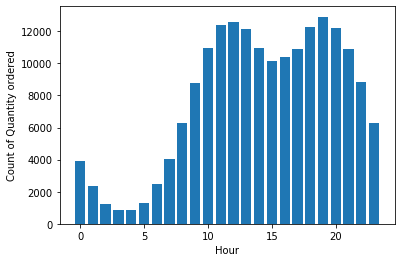

In [27]:
# Alternatively Bar chart can also show hourly purchase
plt.bar(hour.index, hour['Quantity Ordered'])
plt.xlabel('Hour')
plt.ylabel('Count of Quantity ordered')
plt.show()

# Chart shows Advertisement from 10AM till 6PM would be the best timing

In [28]:
# Which product combination was most purchased?
#On basis of Order ID, one can find that some products are purchased together.
all_mon = all_mon.copy()
all_mon.head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale_Amount,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),7
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA),10
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),10
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA),14


In [29]:
# return product of same order ID

#all_mon.groupby('Order ID').sum()

In [30]:
# One way to get products with same order ID is to use transform function

all_mon['combined'] = all_mon.groupby('Order ID')['Product'].transform('sum')
all_mon

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale_Amount,City,Hour,combined
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,Google PhoneWired Headphones
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,Google PhoneWired Headphones
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,Wired Headphones
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,AAA Batteries (4-pack)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,iPhone
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,iPhone
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,34in Ultrawide Monitor


In [31]:
# Create df of only duplicated rows
dup_df = all_mon[all_mon['Order ID'].duplicated(keep=False)]
dup_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale_Amount,City,Hour,combined
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,Google PhoneWired Headphones
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,Google PhoneWired Headphones
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,Google PhoneUSB-C Charging Cable
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,Google PhoneUSB-C Charging Cable
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,Bose SoundSport HeadphonesBose SoundSport Head...
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,34in Ultrawide MonitorAA Batteries (4-pack)
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,Wired HeadphonesAAA Batteries (4-pack)
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,Wired HeadphonesAAA Batteries (4-pack)
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,Google PhoneUSB-C Charging Cable


In [32]:
# Drop duplicated rows
dup_dropped = dup_df.drop_duplicates(subset = ['Order ID', 'combined'], inplace=False)
dup_dropped

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale_Amount,City,Hour,combined
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,Google PhoneWired Headphones
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,Google PhoneUSB-C Charging Cable
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,Bose SoundSport HeadphonesBose SoundSport Head...
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,AAA Batteries (4-pack)Google Phone
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,Lightning Charging CableUSB-C Charging Cable
...,...,...,...,...,...,...,...,...,...,...,...
186781,259296,Apple Airpods Headphones,1,150.00,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001",9,150.00,Dallas (TX),16,Apple Airpods HeadphonesApple Airpods Headphones
186783,259297,iPhone,1,700.00,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215",9,700.00,Boston (MA),18,iPhoneLightning Charging CableLightning Chargi...
186791,259303,34in Ultrawide Monitor,1,379.99,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta (GA),20,34in Ultrawide MonitorAA Batteries (4-pack)
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,Wired HeadphonesAAA Batteries (4-pack)


In [33]:
# Get counts of unique combination of products
dup_dropped['combined'].value_counts()

iPhoneLightning Charging Cable              882
Google PhoneUSB-C Charging Cable            856
iPhoneWired Headphones                      361
Vareebadd PhoneUSB-C Charging Cable         312
Google PhoneWired Headphones                303
                                           ... 
Vareebadd PhoneiPhone                         1
iPhoneLightning Charging CableiPhone          1
34in Ultrawide MonitorLG Washing Machine      1
LG Dryer27in FHD Monitor                      1
Vareebadd Phone27in FHD Monitor               1
Name: combined, Length: 366, dtype: int64

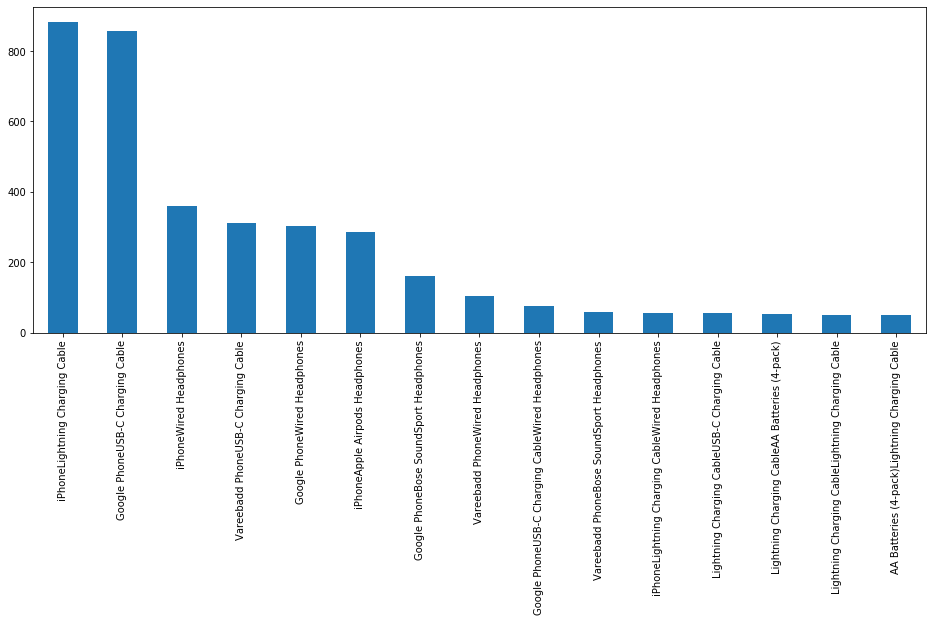

In [34]:
# Visualize top 15 product combination purchased 
plt.figure(figsize=(16,6))
dup_dropped['combined'].value_counts().head(15).plot(kind='bar')

In [35]:
# List of last 15 product combinations purchased
dup_dropped['combined'].value_counts().tail(15)

ThinkPad LaptopVareebadd Phone                                         1
iPhoneLightning Charging Cable34in Ultrawide Monitor                   1
Vareebadd PhoneLightning Charging Cable                                1
Macbook Pro LaptopFlatscreen TV                                        1
Vareebadd PhoneUSB-C Charging CableApple Airpods Headphones            1
iPhoneLightning Charging CableWired HeadphonesAA Batteries (4-pack)    1
LG DryerVareebadd Phone                                                1
iPhoneWired HeadphonesLightning Charging Cable                         1
27in FHD MonitorVareebadd Phone                                        1
Google PhoneUSB-C Charging Cable27in FHD Monitor                       1
Vareebadd PhoneiPhone                                                  1
iPhoneLightning Charging CableiPhone                                   1
34in Ultrawide MonitorLG Washing Machine                               1
LG Dryer27in FHD Monitor                           